In [1]:
version()

'SageMath version 9.3, Release Date: 2021-05-09'

In [2]:
%display latex

In [3]:
#Definición de la variedad
M=Manifold(4,'M', structure='Lorentzian', latex_name=r'\mathcal{M}')
X.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:\varphi')
#Definicion de variables
r, s, x, rh=var('r s x r_h')

In [4]:
#Definición de la métrica
function('eLamb',   latex_name=r'e^\Lambda');
function('f',   latex_name=r'f');
var('dilaton', latex_name=r'\phi');
var('Gamm',    latex_name=r'\Gamma');
var('Ddilaton', latex_name=r'\frac{d\phi}{dr}');
var('DGamm',    latex_name=r'\frac{d\Gamma}{dr}');
g=M.metric()
g[0,0]=-exp(Gamm)
g[1,1]=eLamb(r)
g[2,2]=r^2
g[3,3]=r^2*sin(th)^2
g.display()

g = -e^Gamm dt*dt + eLamb(r) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

Hallando $e^\Lambda$ en función de $\phi$ y $\Gamma$.

In [5]:
beta(r)=Ddilaton^2*r^2/4-1-DGamm*(r+exp(dilaton)*Ddilaton/2)
gamm(r)=3/2*DGamm*Ddilaton*exp(dilaton)
sol_eLamb=(-beta+sqrt(beta^2-4*gamm))/2
sol_eLamb

r |--> -1/8*Ddilaton^2*r^2 + 1/4*(Ddilaton*e^dilaton + 2*r)*DGamm + 1/2*sqrt(-6*DGamm*Ddilaton*e^dilaton + 1/16*(Ddilaton^2*r^2 - 2*(Ddilaton*e^dilaton + 2*r)*DGamm - 4)^2) + 1/2

Planteando las ecuaciones diferenciales

$\phi''(r)=\frac{d_1}{d}$

$\Gamma''(r)=\frac{d_2}{d}$

In [6]:
d=4*eLamb(r)^2*exp(dilaton)*r*(-4+8*eLamb(r)-4*eLamb(r)^2-
                                  4*DGamm*r+
                                  4*DGamm*eLamb(r)*r+
                                  5*Ddilaton^2*r^2-
                                  Ddilaton^2*eLamb(r)*r^2)+\
    4*Ddilaton*eLamb(r)*exp(dilaton)^2*(6-
                                       12*eLamb(r)+6*eLamb(r)^2+
                                       6*DGamm*r-
                                       8*DGamm*eLamb(r)*r+
                                       2*DGamm*eLamb(r)^2*r-
                                       3*Ddilaton^2*r^2+
                                       Ddilaton^2*eLamb(r)*r^2)-\
    12*DGamm*Ddilaton^2*exp(3*dilaton)*(1-eLamb(r))^2-8*Ddilaton*eLamb(r)^3*r^4
d

-8*Ddilaton*r^4*eLamb(r)^3 - 12*DGamm*Ddilaton^2*(eLamb(r) - 1)^2*e^(3*dilaton) - 4*(Ddilaton^2*r^2*eLamb(r) - 5*Ddilaton^2*r^2 - 4*DGamm*r*eLamb(r) + 4*DGamm*r + 4*eLamb(r)^2 - 8*eLamb(r) + 4)*r*eLamb(r)^2*e^dilaton + 4*(Ddilaton^2*r^2*eLamb(r) - 3*Ddilaton^2*r^2 + 2*DGamm*r*eLamb(r)^2 - 8*DGamm*r*eLamb(r) + 6*DGamm*r + 6*eLamb(r)^2 - 12*eLamb(r) + 6)*Ddilaton*eLamb(r)*e^(2*dilaton)

In [7]:
d1=2*DGamm*Ddilaton^3*exp(3*dilaton)*\
        (9*DGamm-6*Ddilaton-
        6*DGamm*eLamb(r)+12*Ddilaton*eLamb(r)+
        DGamm*eLamb(r)^2-6*Ddilaton*eLamb(r)^2)+\
Ddilaton^2*eLamb(r)*exp(2*dilaton)*\
        (24*Ddilaton-8*DGamm*eLamb(r)-
         48*Ddilaton*eLamb(r)+8*DGamm*eLamb(r)^2+
         24*Ddilaton*eLamb(r)^2-42*DGamm^2*r-
         30*Ddilaton^2*r+20*DGamm^2*eLamb(r)*r-
         32*DGamm*Ddilaton*eLamb(r)*r+
         16*Ddilaton^2*eLamb(r)*r-2*DGamm^2*eLamb(r)^2*r-
         2*Ddilaton^2*eLamb(r)^2*r+
         3*DGamm*Ddilaton^2*r^2-
         3*DGamm*Ddilaton^2*eLamb(r)*r^2+
         24*DGamm*Ddilaton*r+
         8*DGamm*Ddilaton*eLamb(r)^2*r)+\
Ddilaton*eLamb(r)^2*exp(dilaton)*\
        (-24+48*eLamb(r)-24*eLamb(r)^2-
         4*DGamm*r-16*Ddilaton*r+
        8*DGamm*eLamb(r)*r+
        32*Ddilaton*eLamb(r)*r-
        4*DGamm*eLamb(r)^2*r-
        16*Ddilaton*eLamb(r)^2*r+
        32*DGamm^2*r^2-
        16*DGamm*Ddilaton*r^2+
        38*Ddilaton^2*r^2+
        16*DGamm*Ddilaton*eLamb(r)*r^2-
        6*Ddilaton^2*eLamb(r)*r^2-
        3*DGamm*Ddilaton^2*r^3+
        DGamm*Ddilaton^2*eLamb(r)*r^3-
        8*DGamm^2*eLamb(r)*r^2)+\
2*eLamb(r)^3*r*\
     (8-16*eLamb(r)+8*eLamb(r)^2+
     4*DGamm*r-4*DGamm*eLamb(r)*r-
     4*DGamm^2*r^2-6*Ddilaton^2*r^2+
     DGamm*Ddilaton^2*r^3-
     2*Ddilaton^2*eLamb(r)*r^2)
d1

2*(DGamm*eLamb(r)^2 - 6*Ddilaton*eLamb(r)^2 - 6*DGamm*eLamb(r) + 12*Ddilaton*eLamb(r) + 9*DGamm - 6*Ddilaton)*DGamm*Ddilaton^3*e^(3*dilaton) + 2*(DGamm*Ddilaton^2*r^3 - 2*Ddilaton^2*r^2*eLamb(r) - 4*DGamm^2*r^2 - 6*Ddilaton^2*r^2 - 4*DGamm*r*eLamb(r) + 4*DGamm*r + 8*eLamb(r)^2 - 16*eLamb(r) + 8)*r*eLamb(r)^3 - (3*DGamm*Ddilaton^2*r^2*eLamb(r) - 3*DGamm*Ddilaton^2*r^2 + 2*DGamm^2*r*eLamb(r)^2 - 8*DGamm*Ddilaton*r*eLamb(r)^2 + 2*Ddilaton^2*r*eLamb(r)^2 - 20*DGamm^2*r*eLamb(r) + 32*DGamm*Ddilaton*r*eLamb(r) - 16*Ddilaton^2*r*eLamb(r) + 42*DGamm^2*r - 24*DGamm*Ddilaton*r + 30*Ddilaton^2*r - 8*DGamm*eLamb(r)^2 - 24*Ddilaton*eLamb(r)^2 + 8*DGamm*eLamb(r) + 48*Ddilaton*eLamb(r) - 24*Ddilaton)*Ddilaton^2*eLamb(r)*e^(2*dilaton) + (DGamm*Ddilaton^2*r^3*eLamb(r) - 3*DGamm*Ddilaton^2*r^3 - 8*DGamm^2*r^2*eLamb(r) + 16*DGamm*Ddilaton*r^2*eLamb(r) - 6*Ddilaton^2*r^2*eLamb(r) + 32*DGamm^2*r^2 - 16*DGamm*Ddilaton*r^2 + 38*Ddilaton^2*r^2 - 4*DGamm*r*eLamb(r)^2 - 16*Ddilaton*r*eLamb(r)^2 + 8*DGamm*r*eLamb(r) + 32*Ddilaton*r*eLamb(r) - 4*DGamm*r - 16*Ddilaton*r - 24*eLamb(r)^2 + 48*eLamb(r) - 24)*Ddilaton*eLamb(r)^2*e^dilaton

In [8]:
d2=DGamm*Ddilaton*eLamb(r)*exp(2*dilaton)*r*\
        (18*DGamm^2+
         6*Ddilaton^2-
         4*DGamm^2*eLamb(r)+
         8*Ddilaton^2*eLamb(r)+
         2*DGamm^2*eLamb(r)^2+
         2*Ddilaton^2*eLamb(r)^2+
         5*DGamm*Ddilaton^2*eLamb(r)*r-
         8*Ddilaton^3*eLamb(r)*r-
         9*DGamm*Ddilaton^2*r)-\
    2*DGamm^3*Ddilaton^2*exp(3*dilaton)*(3+eLamb(r)^2)+\
Ddilaton*eLamb(r)^3*r^2*\
        (8-
        8*eLamb(r)-
        4*DGamm*r-
        4*DGamm*eLamb(r)*r-
        4*DGamm^2*r^2-
        2*Ddilaton^2*r^2+
        DGamm*Ddilaton^2*r^3)+\
eLamb(r)^2*exp(dilaton)*(
    8*DGamm-
    16*DGamm*eLamb(r)+
    8*DGamm*eLamb(r)^2-
    4*DGamm^2*r+
    8*Ddilaton^2*r+
    8*DGamm^2*eLamb(r)*r-
    4*DGamm^2*eLamb(r)^2*r-
    8*Ddilaton^2*eLamb(r)^2*r-
    12*DGamm^3*r^2-
    10*DGamm*Ddilaton^2*r^2-
    8*Ddilaton^3*r^2+
    4*DGamm^3*eLamb(r)*r^2+
    2*DGamm*Ddilaton^2*eLamb(r)*r^2+
    8*Ddilaton^3*eLamb(r)*r^2+
    13*DGamm^2*Ddilaton^2*r^3+
    4*DGamm*Ddilaton^3*r^3+
    6*Ddilaton^4*r^3+
    4*DGamm*Ddilaton^3*eLamb(r)*r^3-
    2*Ddilaton^4*eLamb(r)*r^3-
    3*DGamm*Ddilaton^4*r^4-
    3*DGamm^2*Ddilaton^2*eLamb(r)*r^3)

In [9]:
eq1=-(d1/d).substitute_function(eLamb,sol_eLamb) #  = \phi''
eq2=-(d2/d).substitute_function(eLamb,sol_eLamb) #  = \Gamma''

### Solución para $\phi_h = -1.0$.

In [10]:
#Parámetros iniciales
rh=1            #valor de r en el horizonte de eventos
r0=rh+1*10^-6   #valor inicial de r para la solución del Sist. de E.D.
dilh=-1         #valor del campo dilaton \phi en el horizonte de eventos
Ddilh=rh*exp(-dilh)*(-1+sqrt(1-6*e^(2*dilh)/rh^4)) #valor de \phi' en el horizonte de eventos
DGamm0=1/(r0-rh)   #valor de \Gamma' en el horizonte de eventos

#Parámetros de iteración
GSch=ln(1-1/1000) #valor aprox. de Gamma en r=1000 según Schwarzschild
G0 = -15           #valor tentativo de Gamma en r0
DeltaG = 0          #corrección de G0

#Solución del sistema de E.D.

#Solución para r entre 1+10^-6 y 1.001
P0=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],       #E.D. a resolver
                     [dilaton,Gamm,Ddilaton,DGamm],       #Variables dependientes
                     ics=[r0,dilh,G0,Ddilh,DGamm0],       #Condiciones iniciales
                     ivar=r,                              #Variable dependiente
                     end_points=1.001,                    #r al final del intervalo de la solución
                     step=0.000001)                       #tamaño de paso
#Solución para r entre 1.001 y 1.01
ICS1=P0[len(P0)-1] #Valores al final del intervalo anterior
P1=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],       #E.D. a resolver
                     [dilaton,Gamm,Ddilaton,DGamm],       #Variables dependientes
                     ics=ICS1,                            #Condiciones iniciales del nuevo intervalo
                     ivar=r,                              #Variable dependiente
                     end_points=1.01,                     #r al final del intervalo
                     step=0.00001)                        #tamaño de paso
    
#Solución para r entre 1.01 y 1.2
ICS2=P1[len(P1)-1] #Valores al final del intervalo anterior
P2=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],       #E.D. a resolver
                     [dilaton,Gamm,Ddilaton,DGamm],       #Variables dependientes
                     ics=ICS2,                            #Condiciones iniciales del nuevo intervalo
                     ivar=r,                              #Variable dependiente
                     end_points=2,                        #r al final del intervalo
                     step=0.001)                          #tamaño de paso

#Solución para r entre 1.2 y 10
ICS3=P2[len(P2)-1]
P3=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],
                     [dilaton,Gamm,Ddilaton,DGamm],
                     ics=ICS3,
                     ivar=r,
                     end_points=10,
                     step=0.01)

#Solución para r entre 10 y 100
ICS4=P3[len(P3)-1]
P4=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],
                     [dilaton,Gamm,Ddilaton,DGamm],
                     ics=ICS4,
                     ivar=r,
                     end_points=100,
                     step=0.2)


#Solución para r entre 100 y 1000
ICS5=P4[len(P4)-1]
P5=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],
                     [dilaton,Gamm,Ddilaton,DGamm],
                     ics=ICS5,
                     ivar=r,
                     end_points=1000,
                     step=2)
DeltaG=GSch-P5[len(P5)-1][2]

#Construyendo la solución como la union de las soluciones anteriores:
PTotal=P0+P1+P2+P3+P4+P5

#Extrayendo las soluciones de cada una de las variables independientes:
Q1=[ [i,j] for i,j,k,l,m in PTotal] #phi
Q2=[ [i,k+DeltaG] for i,j,k,l,m in PTotal] #Gamma
Q3=[ [i,l] for i,j,k,l,m in PTotal] #dphi/dr
Q4=[ [i,m] for i,j,k,l,m in PTotal] #dGamma/dr

In [11]:
phi0_10 = [ [i,j-Q1[len(Q1)-1][1]]   for i,j in Q1]
alpha_10 = exp(Q1[len(Q1)-1][1])
Gamm_10 = [ [i,j]   for i,j in Q2] 
gtt_10  = [ [i,-e^j] for i,j in Q2]
grr_10  = [ [i,sol_eLamb.subs(r=i, dilaton=j, Ddilaton=l, DGamm=m)] for i,j,k,l,m in PTotal]

### Solución para $\phi_h = -1.2$.

In [12]:
#Parámetros iniciales
rh=1            #valor de r en el horizonte de eventos
r0=rh+1*10^-6   #valor inicial de r para la solución del Sist. de E.D.
dilh=-1.2         #valor del campo dilaton \phi en el horizonte de eventos
Ddilh=rh*exp(-dilh)*(-1+sqrt(1-6*e^(2*dilh)/rh^4)) #valor de \phi' en el horizonte de eventos
DGamm0=1/(r0-rh)   #valor de \Gamma' en el horizonte de eventos

#Parámetros de iteración
GSch=ln(1-1/1000) #valor aprox. de Gamma en r=1000 según Schwarzschild
G0 = -15           #valor tentativo de Gamma en r0
DeltaG = 0          #corrección de G0

#Solución del sistema de E.D.

#Solución para r entre 1+10^-6 y 1.001
P0=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],       #E.D. a resolver
                     [dilaton,Gamm,Ddilaton,DGamm],       #Variables dependientes
                     ics=[r0,dilh,G0,Ddilh,DGamm0],       #Condiciones iniciales
                     ivar=r,                              #Variable dependiente
                     end_points=1.001,                    #r al final del intervalo de la solución
                     step=0.000001)                       #tamaño de paso
#Solución para r entre 1.001 y 1.01
ICS1=P0[len(P0)-1] #Valores al final del intervalo anterior
P1=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],       #E.D. a resolver
                     [dilaton,Gamm,Ddilaton,DGamm],       #Variables dependientes
                     ics=ICS1,                            #Condiciones iniciales del nuevo intervalo
                     ivar=r,                              #Variable dependiente
                     end_points=1.01,                     #r al final del intervalo
                     step=0.00001)                        #tamaño de paso
    
#Solución para r entre 1.01 y 1.2
ICS2=P1[len(P1)-1] #Valores al final del intervalo anterior
P2=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],       #E.D. a resolver
                     [dilaton,Gamm,Ddilaton,DGamm],       #Variables dependientes
                     ics=ICS2,                            #Condiciones iniciales del nuevo intervalo
                     ivar=r,                              #Variable dependiente
                     end_points=2,                        #r al final del intervalo
                     step=0.001)                          #tamaño de paso

#Solución para r entre 1.2 y 10
ICS3=P2[len(P2)-1]
P3=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],
                     [dilaton,Gamm,Ddilaton,DGamm],
                     ics=ICS3,
                     ivar=r,
                     end_points=10,
                     step=0.01)

#Solución para r entre 10 y 100
ICS4=P3[len(P3)-1]
P4=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],
                     [dilaton,Gamm,Ddilaton,DGamm],
                     ics=ICS4,
                     ivar=r,
                     end_points=100,
                     step=0.2)


#Solución para r entre 100 y 1000
ICS5=P4[len(P4)-1]
P5=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],
                     [dilaton,Gamm,Ddilaton,DGamm],
                     ics=ICS5,
                     ivar=r,
                     end_points=1000,
                     step=2)
DeltaG=GSch-P5[len(P5)-1][2]

#Construyendo la solución como la union de las soluciones anteriores:
PTotal=P0+P1+P2+P3+P4+P5

#Extrayendo las soluciones de cada una de las variables independientes:
Q1=[ [i,j] for i,j,k,l,m in PTotal] #phi
Q2=[ [i,k+DeltaG] for i,j,k,l,m in PTotal] #Gamma
Q3=[ [i,l] for i,j,k,l,m in PTotal] #dphi/dr
Q4=[ [i,m] for i,j,k,l,m in PTotal] #dGamma/dr

In [13]:
phi0_12 = [ [i,j-Q1[len(Q1)-1][1]]   for i,j in Q1]
alpha_12 = exp(Q1[len(Q1)-1][1])
Gamm_12 = [ [i,j]   for i,j in Q2] 
gtt_12  = [ [i,-e^j] for i,j in Q2]
grr_12  = [ [i,sol_eLamb.subs(r=i, dilaton=j, Ddilaton=l, DGamm=m)] for i,j,k,l,m in PTotal]

### Solución para $\phi_h = -1.5$.

In [14]:
#Parámetros iniciales
rh=1            #valor de r en el horizonte de eventos
r0=rh+1*10^-6   #valor inicial de r para la solución del Sist. de E.D.
dilh=-1.5         #valor del campo dilaton \phi en el horizonte de eventos
Ddilh=rh*exp(-dilh)*(-1+sqrt(1-6*e^(2*dilh)/rh^4)) #valor de \phi' en el horizonte de eventos
DGamm0=1/(r0-rh)   #valor de \Gamma' en el horizonte de eventos

#Parámetros de iteración
GSch=ln(1-1/1000) #valor aprox. de Gamma en r=1000 según Schwarzschild
G0 = -15           #valor tentativo de Gamma en r0
DeltaG = 0          #corrección de G0

#Solución del sistema de E.D.

#Solución para r entre 1+10^-6 y 1.001
P0=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],       #E.D. a resolver
                     [dilaton,Gamm,Ddilaton,DGamm],       #Variables dependientes
                     ics=[r0,dilh,G0,Ddilh,DGamm0],       #Condiciones iniciales
                     ivar=r,                              #Variable dependiente
                     end_points=1.001,                    #r al final del intervalo de la solución
                     step=0.000001)                       #tamaño de paso
#Solución para r entre 1.001 y 1.01
ICS1=P0[len(P0)-1] #Valores al final del intervalo anterior
P1=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],       #E.D. a resolver
                     [dilaton,Gamm,Ddilaton,DGamm],       #Variables dependientes
                     ics=ICS1,                            #Condiciones iniciales del nuevo intervalo
                     ivar=r,                              #Variable dependiente
                     end_points=1.01,                     #r al final del intervalo
                     step=0.00001)                        #tamaño de paso
    
#Solución para r entre 1.01 y 1.2
ICS2=P1[len(P1)-1] #Valores al final del intervalo anterior
P2=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],       #E.D. a resolver
                     [dilaton,Gamm,Ddilaton,DGamm],       #Variables dependientes
                     ics=ICS2,                            #Condiciones iniciales del nuevo intervalo
                     ivar=r,                              #Variable dependiente
                     end_points=2,                        #r al final del intervalo
                     step=0.001)                          #tamaño de paso

#Solución para r entre 1.2 y 10
ICS3=P2[len(P2)-1]
P3=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],
                     [dilaton,Gamm,Ddilaton,DGamm],
                     ics=ICS3,
                     ivar=r,
                     end_points=10,
                     step=0.01)

#Solución para r entre 10 y 100
ICS4=P3[len(P3)-1]
P4=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],
                     [dilaton,Gamm,Ddilaton,DGamm],
                     ics=ICS4,
                     ivar=r,
                     end_points=100,
                     step=0.2)


#Solución para r entre 100 y 1000
ICS5=P4[len(P4)-1]
P5=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],
                     [dilaton,Gamm,Ddilaton,DGamm],
                     ics=ICS5,
                     ivar=r,
                     end_points=1000,
                     step=2)
DeltaG=GSch-P5[len(P5)-1][2]

#Construyendo la solución como la union de las soluciones anteriores:
PTotal=P0+P1+P2+P3+P4+P5

#Extrayendo las soluciones de cada una de las variables independientes:
Q1=[ [i,j] for i,j,k,l,m in PTotal] #phi
Q2=[ [i,k+DeltaG] for i,j,k,l,m in PTotal] #Gamma
Q3=[ [i,l] for i,j,k,l,m in PTotal] #dphi/dr
Q4=[ [i,m] for i,j,k,l,m in PTotal] #dGamma/dr

In [15]:
phi0_15 = [ [i,j-Q1[len(Q1)-1][1]]   for i,j in Q1]
alpha_15 = exp(Q1[len(Q1)-1][1])
Gamm_15 = [ [i,j]   for i,j in Q2] 
gtt_15  = [ [i,-e^j] for i,j in Q2]
grr_15  = [ [i,sol_eLamb.subs(r=i, dilaton=j, Ddilaton=l, DGamm=m)] for i,j,k,l,m in PTotal]

### Solución para $\phi_h = -2.0$.

In [16]:
#Parámetros iniciales
rh=1            #valor de r en el horizonte de eventos
r0=rh+1*10^-6   #valor inicial de r para la solución del Sist. de E.D.
dilh=-2         #valor del campo dilaton \phi en el horizonte de eventos
Ddilh=rh*exp(-dilh)*(-1+sqrt(1-6*e^(2*dilh)/rh^4)) #valor de \phi' en el horizonte de eventos
DGamm0=1/(r0-rh)   #valor de \Gamma' en el horizonte de eventos

#Parámetros de iteración
GSch=ln(1-1/1000) #valor aprox. de Gamma en r=1000 según Schwarzschild
G0 = -15           #valor tentativo de Gamma en r0
DeltaG = 0          #corrección de G0

#Solución del sistema de E.D.

#Solución para r entre 1+10^-6 y 1.001
P0=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],       #E.D. a resolver
                     [dilaton,Gamm,Ddilaton,DGamm],       #Variables dependientes
                     ics=[r0,dilh,G0,Ddilh,DGamm0],       #Condiciones iniciales
                     ivar=r,                              #Variable dependiente
                     end_points=1.001,                    #r al final del intervalo de la solución
                     step=0.000001)                       #tamaño de paso
#Solución para r entre 1.001 y 1.01
ICS1=P0[len(P0)-1] #Valores al final del intervalo anterior
P1=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],       #E.D. a resolver
                     [dilaton,Gamm,Ddilaton,DGamm],       #Variables dependientes
                     ics=ICS1,                            #Condiciones iniciales del nuevo intervalo
                     ivar=r,                              #Variable dependiente
                     end_points=1.01,                     #r al final del intervalo
                     step=0.00001)                        #tamaño de paso
    
#Solución para r entre 1.01 y 1.2
ICS2=P1[len(P1)-1] #Valores al final del intervalo anterior
P2=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],       #E.D. a resolver
                     [dilaton,Gamm,Ddilaton,DGamm],       #Variables dependientes
                     ics=ICS2,                            #Condiciones iniciales del nuevo intervalo
                     ivar=r,                              #Variable dependiente
                     end_points=2,                        #r al final del intervalo
                     step=0.001)                          #tamaño de paso

#Solución para r entre 1.2 y 10
ICS3=P2[len(P2)-1]
P3=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],
                     [dilaton,Gamm,Ddilaton,DGamm],
                     ics=ICS3,
                     ivar=r,
                     end_points=10,
                     step=0.01)

#Solución para r entre 10 y 100
ICS4=P3[len(P3)-1]
P4=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],
                     [dilaton,Gamm,Ddilaton,DGamm],
                     ics=ICS4,
                     ivar=r,
                     end_points=100,
                     step=0.2)


#Solución para r entre 100 y 1000
ICS5=P4[len(P4)-1]
P5=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],
                     [dilaton,Gamm,Ddilaton,DGamm],
                     ics=ICS5,
                     ivar=r,
                     end_points=1000,
                     step=2)
DeltaG=GSch-P5[len(P5)-1][2]

#Construyendo la solución como la union de las soluciones anteriores:
PTotal=P0+P1+P2+P3+P4+P5

#Extrayendo las soluciones de cada una de las variables independientes:
Q1=[ [i,j] for i,j,k,l,m in PTotal] #phi
Q2=[ [i,k+DeltaG] for i,j,k,l,m in PTotal] #Gamma
Q3=[ [i,l] for i,j,k,l,m in PTotal] #dphi/dr
Q4=[ [i,m] for i,j,k,l,m in PTotal] #dGamma/dr

In [17]:
phi0_20 = [ [i,j-Q1[len(Q1)-1][1]]   for i,j in Q1]
alpha_20 = exp(Q1[len(Q1)-1][1])
Gamm_20 = [ [i,j]   for i,j in Q2] 
gtt_20  = [ [i,-e^j] for i,j in Q2]
grr_20  = [ [i,sol_eLamb.subs(r=i, dilaton=j, Ddilaton=l, DGamm=m)] for i,j,k,l,m in PTotal]

### Solución para $\phi_h = -5.0$.

In [18]:
#Parámetros iniciales
rh=1            #valor de r en el horizonte de eventos
r0=rh+1*10^-6   #valor inicial de r para la solución del Sist. de E.D.
dilh=-5         #valor del campo dilaton \phi en el horizonte de eventos
Ddilh=rh*exp(-dilh)*(-1+sqrt(1-6*e^(2*dilh)/rh^4)) #valor de \phi' en el horizonte de eventos
DGamm0=1/(r0-rh)   #valor de \Gamma' en el horizonte de eventos

#Parámetros de iteración
GSch=ln(1-1/1000) #valor aprox. de Gamma en r=1000 según Schwarzschild
G0 = -15           #valor tentativo de Gamma en r0
DeltaG = 0          #corrección de G0

#Solución del sistema de E.D.

#Solución para r entre 1+10^-6 y 1.001
P0=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],       #E.D. a resolver
                     [dilaton,Gamm,Ddilaton,DGamm],       #Variables dependientes
                     ics=[r0,dilh,G0,Ddilh,DGamm0],       #Condiciones iniciales
                     ivar=r,                              #Variable dependiente
                     end_points=1.001,                    #r al final del intervalo de la solución
                     step=0.000001)                       #tamaño de paso
#Solución para r entre 1.001 y 1.01
ICS1=P0[len(P0)-1] #Valores al final del intervalo anterior
P1=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],       #E.D. a resolver
                     [dilaton,Gamm,Ddilaton,DGamm],       #Variables dependientes
                     ics=ICS1,                            #Condiciones iniciales del nuevo intervalo
                     ivar=r,                              #Variable dependiente
                     end_points=1.01,                     #r al final del intervalo
                     step=0.00001)                        #tamaño de paso
    
#Solución para r entre 1.01 y 1.2
ICS2=P1[len(P1)-1] #Valores al final del intervalo anterior
P2=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],       #E.D. a resolver
                     [dilaton,Gamm,Ddilaton,DGamm],       #Variables dependientes
                     ics=ICS2,                            #Condiciones iniciales del nuevo intervalo
                     ivar=r,                              #Variable dependiente
                     end_points=2,                        #r al final del intervalo
                     step=0.001)                          #tamaño de paso

#Solución para r entre 1.2 y 10
ICS3=P2[len(P2)-1]
P3=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],
                     [dilaton,Gamm,Ddilaton,DGamm],
                     ics=ICS3,
                     ivar=r,
                     end_points=10,
                     step=0.01)

#Solución para r entre 10 y 100
ICS4=P3[len(P3)-1]
P4=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],
                     [dilaton,Gamm,Ddilaton,DGamm],
                     ics=ICS4,
                     ivar=r,
                     end_points=100,
                     step=0.2)


#Solución para r entre 100 y 1000
ICS5=P4[len(P4)-1]
P5=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],
                     [dilaton,Gamm,Ddilaton,DGamm],
                     ics=ICS5,
                     ivar=r,
                     end_points=1000,
                     step=2)
DeltaG=GSch-P5[len(P5)-1][2]

#Construyendo la solución como la union de las soluciones anteriores:
PTotal=P0+P1+P2+P3+P4+P5

#Extrayendo las soluciones de cada una de las variables independientes:
Q1=[ [i,j] for i,j,k,l,m in PTotal] #phi
Q2=[ [i,k+DeltaG] for i,j,k,l,m in PTotal] #Gamma
Q3=[ [i,l] for i,j,k,l,m in PTotal] #dphi/dr
Q4=[ [i,m] for i,j,k,l,m in PTotal] #dGamma/dr

In [19]:
phi0_50 = [ [i,j-Q1[len(Q1)-1][1]]   for i,j in Q1]
alpha_50 = exp(Q1[len(Q1)-1][1])
Gamm_50 = [ [i,j]   for i,j in Q2] 
gtt_50  = [ [i,-e^j] for i,j in Q2]
grr_50  = [ [i,sol_eLamb.subs(r=i, dilaton=j, Ddilaton=l, DGamm=m)] for i,j,k,l,m in PTotal]

### Solución para $\phi_h = -10.0$.

In [20]:
#Parámetros iniciales
rh=1            #valor de r en el horizonte de eventos
r0=rh+1*10^-6   #valor inicial de r para la solución del Sist. de E.D.
dilh=-10         #valor del campo dilaton \phi en el horizonte de eventos
Ddilh=rh*exp(-dilh)*(-1+sqrt(1-6*e^(2*dilh)/rh^4)) #valor de \phi' en el horizonte de eventos
DGamm0=1/(r0-rh)   #valor de \Gamma' en el horizonte de eventos

#Parámetros de iteración
GSch=ln(1-1/1000) #valor aprox. de Gamma en r=1000 según Schwarzschild
G0 = -15           #valor tentativo de Gamma en r0
DeltaG = 0          #corrección de G0

#Solución del sistema de E.D.

#Solución para r entre 1+10^-6 y 1.001
P0=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],       #E.D. a resolver
                     [dilaton,Gamm,Ddilaton,DGamm],       #Variables dependientes
                     ics=[r0,dilh,G0,Ddilh,DGamm0],       #Condiciones iniciales
                     ivar=r,                              #Variable dependiente
                     end_points=1.001,                    #r al final del intervalo de la solución
                     step=0.000001)                       #tamaño de paso
#Solución para r entre 1.001 y 1.01
ICS1=P0[len(P0)-1] #Valores al final del intervalo anterior
P1=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],       #E.D. a resolver
                     [dilaton,Gamm,Ddilaton,DGamm],       #Variables dependientes
                     ics=ICS1,                            #Condiciones iniciales del nuevo intervalo
                     ivar=r,                              #Variable dependiente
                     end_points=1.01,                     #r al final del intervalo
                     step=0.00001)                        #tamaño de paso
    
#Solución para r entre 1.01 y 1.2
ICS2=P1[len(P1)-1] #Valores al final del intervalo anterior
P2=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],       #E.D. a resolver
                     [dilaton,Gamm,Ddilaton,DGamm],       #Variables dependientes
                     ics=ICS2,                            #Condiciones iniciales del nuevo intervalo
                     ivar=r,                              #Variable dependiente
                     end_points=2,                        #r al final del intervalo
                     step=0.001)                          #tamaño de paso

#Solución para r entre 1.2 y 10
ICS3=P2[len(P2)-1]
P3=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],
                     [dilaton,Gamm,Ddilaton,DGamm],
                     ics=ICS3,
                     ivar=r,
                     end_points=10,
                     step=0.01)

#Solución para r entre 10 y 100
ICS4=P3[len(P3)-1]
P4=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],
                     [dilaton,Gamm,Ddilaton,DGamm],
                     ics=ICS4,
                     ivar=r,
                     end_points=100,
                     step=0.2)


#Solución para r entre 100 y 1000
ICS5=P4[len(P4)-1]
P5=desolve_system_rk4([Ddilaton,DGamm,eq1,eq2],
                     [dilaton,Gamm,Ddilaton,DGamm],
                     ics=ICS5,
                     ivar=r,
                     end_points=1000,
                     step=2)
DeltaG=GSch-P5[len(P5)-1][2]

#Construyendo la solución como la union de las soluciones anteriores:
PTotal=P0+P1+P2+P3+P4+P5

#Extrayendo las soluciones de cada una de las variables independientes:
Q1=[ [i,j] for i,j,k,l,m in PTotal] #phi
Q2=[ [i,k+DeltaG] for i,j,k,l,m in PTotal] #Gamma
Q3=[ [i,l] for i,j,k,l,m in PTotal] #dphi/dr
Q4=[ [i,m] for i,j,k,l,m in PTotal] #dGamma/dr

In [21]:
phi0_100 = [ [i,j-Q1[len(Q1)-1][1]]   for i,j in Q1]
alpha_100 = exp(Q1[len(Q1)-1][1])
Gamm_100 = [ [i,j]   for i,j in Q2] 
gtt_100  = [ [i,-e^j] for i,j in Q2]
grr_100  = [ [i,sol_eLamb.subs(r=i, dilaton=j, Ddilaton=l, DGamm=m)] for i,j,k,l,m in PTotal]

Cálculo de $\alpha'$:

In [22]:
alpha_10=numerical_approx(alpha_10,digits=3)
alpha_12=numerical_approx(alpha_12,digits=3)
alpha_15=numerical_approx(alpha_15,digits=3)
alpha_20=numerical_approx(alpha_20,digits=3)
alpha_50=numerical_approx(alpha_50,digits=3)
alpha_100=numerical_approx(alpha_100,digits=3)

## Gráficas

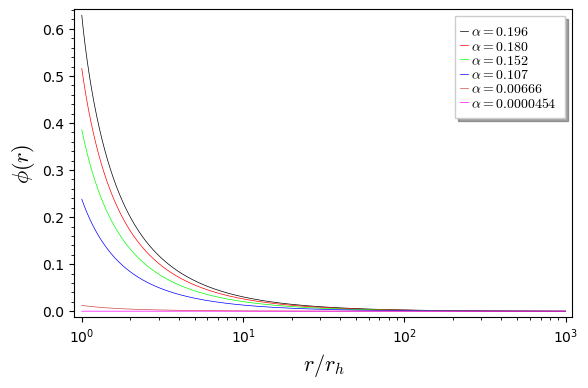

In [23]:
pl_phi0_10=line(phi0_10, legend_label='$\\alpha = %s$'%(alpha_10), scale='semilogx',ymin=0, frame=True, thickness=0.5, rgbcolor=(0,0,0))
pl_phi0_12=line(phi0_12, legend_label='$\\alpha = %s$'%(alpha_12), scale='semilogx',ymin=0, frame=True, thickness=0.5, rgbcolor=(1,0,0))
pl_phi0_15=line(phi0_15, legend_label='$\\alpha = %s$'%(alpha_15), scale='semilogx',ymin=0, frame=True, thickness=0.5, rgbcolor=(0,1,0))
pl_phi0_20=line(phi0_20, legend_label='$\\alpha = %s$'%(alpha_20), scale='semilogx',ymin=0, frame=True, thickness=0.5, rgbcolor=(0,0,1))
pl_phi0_50=line(phi0_50, legend_label='$\\alpha = %s$'%(alpha_50), scale='semilogx',ymin=0, frame=True, thickness=0.5, rgbcolor=(0.8,0.3,0.3))
pl_phi0_100=line(phi0_100, legend_label='$\\alpha = %s$'%(alpha_100), scale='semilogx',ymin=0, frame=True, thickness=0.5, rgbcolor=(1,0,1))
show(pl_phi0_10+pl_phi0_12+pl_phi0_15+pl_phi0_20+pl_phi0_50+pl_phi0_100, frame=True,axes_labels=['$r/r_h$','$\\phi(r)$'])

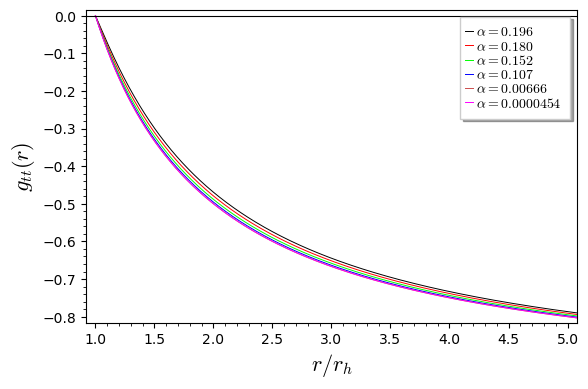

In [24]:
pl_gtt_10=line(gtt_10, legend_label='$\\alpha = %s$'%(alpha_10), thickness=0.7, rgbcolor=(0,0,0))
pl_gtt_12=line(gtt_12, legend_label='$\\alpha = %s$'%(alpha_12), thickness=0.7, rgbcolor=(1,0,0))
pl_gtt_15=line(gtt_15, legend_label='$\\alpha = %s$'%(alpha_15), thickness=0.7, rgbcolor=(0,1,0))
pl_gtt_20=line(gtt_20, legend_label='$\\alpha = %s$'%(alpha_20), thickness=0.7, rgbcolor=(0,0,1))
pl_gtt_50=line(gtt_50, legend_label='$\\alpha = %s$'%(alpha_50), thickness=0.7, rgbcolor=(0.8,0.3,0.3))
pl_gtt_100=line(gtt_100, legend_label='$\\alpha = %s$'%(alpha_100), thickness=0.7, rgbcolor=(1,0,1))
show(pl_gtt_10+pl_gtt_12+pl_gtt_15+pl_gtt_20+pl_gtt_50+pl_gtt_100, frame=True,axes_labels=['$r/r_h$','$g_{tt}(r)$'], xmax=5, ymin=-0.8, ymax=0
     #,figsize=(4.5,5.5),dpi=200
    )

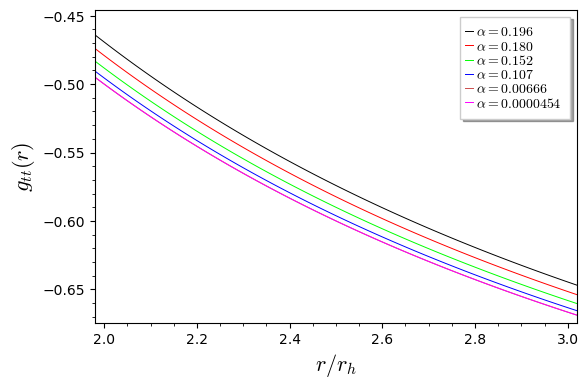

In [25]:
show(pl_gtt_10+pl_gtt_12+pl_gtt_15+pl_gtt_20+pl_gtt_50+pl_gtt_100, frame=True,axes_labels=['$r/r_h$','$g_{tt}(r)$'],xmin=2, xmax=3, ymin=-0.67, ymax=-0.45
     #,figsize=(4.5,5.5), dpi=200
    )

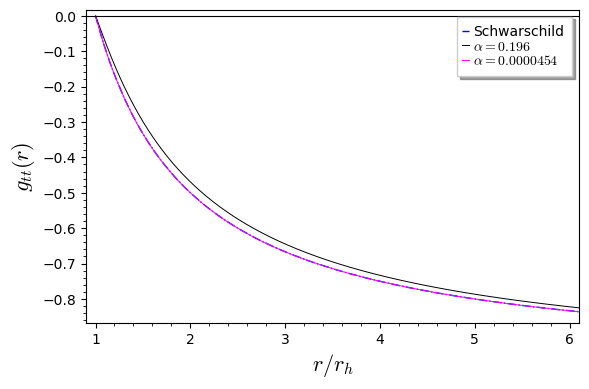

In [26]:
gttE(r)=-(1-1/r)
PttE=gttE.plot(xmin=1, xmax=1000, scale='semilogx', ymax=2, frame=True, legend_label='Schwarschild', rgbcolor=(0,0,1), thickness=1, linestyle='-.')
show(PttE+pl_gtt_10+pl_gtt_100, axes_labels=['$r/r_h$','$g_{tt}(r)$'],xmax=6, ymin=-0.85, ymax=0, scale='linear'
     #, dpi=200
    )

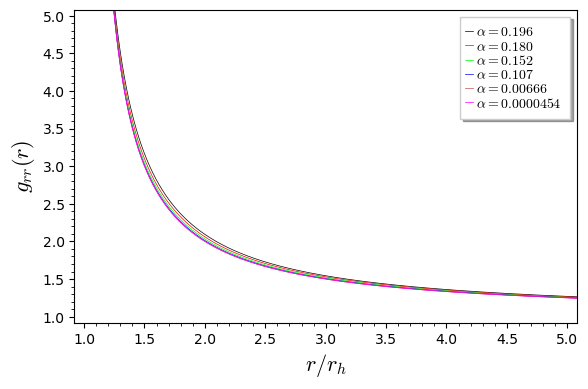

In [27]:
pl_grr_10=line(grr_10, legend_label='$\\alpha = %s$'%(alpha_10), thickness=0.5, rgbcolor=(0,0,0))
pl_grr_12=line(grr_12, legend_label='$\\alpha = %s$'%(alpha_12), thickness=0.5, rgbcolor=(1,0,0))
pl_grr_15=line(grr_15, legend_label='$\\alpha = %s$'%(alpha_15), thickness=0.5, rgbcolor=(0,1,0))
pl_grr_20=line(grr_20, legend_label='$\\alpha = %s$'%(alpha_20), thickness=0.5, rgbcolor=(0,0,1))
pl_grr_50=line(grr_50, legend_label='$\\alpha = %s$'%(alpha_50), thickness=0.5, rgbcolor=(0.8,0.3,0.3))
pl_grr_100=line(grr_100, legend_label='$\\alpha = %s$'%(alpha_100), thickness=0.5, rgbcolor=(1,0,1))
show(pl_grr_10+pl_grr_12+pl_grr_15+pl_grr_20+pl_grr_50+pl_grr_100, frame=True,axes_labels=['$r/r_h$','$g_{rr}(r)$'], xmax=5, ymin=1, ymax=5
     #,figsize=(4.5,5.5), dpi=200
    )

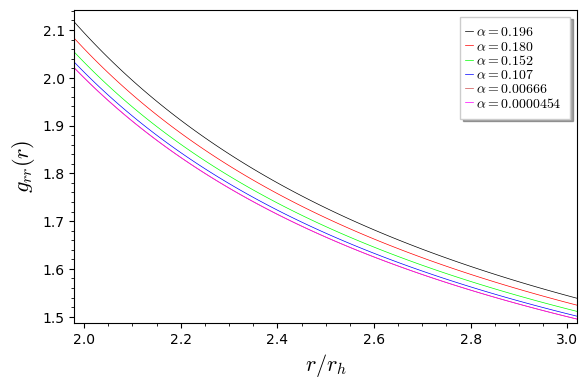

In [28]:
show(pl_grr_10+pl_grr_12+pl_grr_15+pl_grr_20+pl_grr_50+pl_grr_100, frame=True,axes_labels=['$r/r_h$','$g_{rr}(r)$'],xmin=2, xmax=3, ymin=1.5, ymax=2.13
     #,figsize=(4.5,5.5), dpi=200
    )

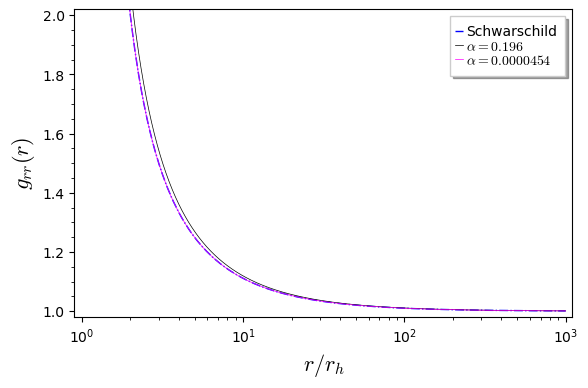

In [29]:
grrE(r)=1/(1-1/r)
PrrE=grrE.plot(xmin=1, xmax=1000, scale='semilogx', ymax=2, frame=True, legend_label='Schwarschild', rgbcolor=(0,0,1), thickness=1, linestyle='-.')
show(PrrE+pl_grr_10+pl_grr_100, xmax=1000, ymin=1, axes_labels=['$r/r_h$','$g_{rr}(r)$']
     #, dpi=200
    )